In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import timedelta

In [ ]:
bert_score = pd.read_csv('./scores/scores_bert.csv')
roberta_score = pd.read_csv('./scores/scores_roberta.csv')
dBert_score = pd.read_csv('./scores/scores_distilbert.csv')
dRoBerta_score = pd.read_csv('./scores/scores_distilroberta.csv')
finbert_score = pd.read_csv('./scores/scores_finbert.csv')

bert_ft_score = pd.read_csv('./scores/scores_bert_finetuned.csv')
roberta_ft_score = pd.read_csv('./scores/scores_roberta_finetuned.csv')
dBert_ft_score = pd.read_csv('./scores/scores_distilbert_finetuned.csv')
dRoBerta_ft_score = pd.read_csv('./scores/scores_distilroberta_finetuned.csv')
finbert_ft_score = pd.read_csv('./scores/scores_finbert_finetuned.csv')

In [ ]:
bert_score

Week        From          To  PERMCO  \
0         1  2016-01-11  2016-01-15    2381   
1         2  2016-01-18  2016-01-22    2381   
2         3  2016-01-25  2016-01-29    2381   
3         4  2016-02-01  2016-02-05    2381   
4         5  2016-02-08  2016-02-12    2381   
...     ...         ...         ...     ...   
10289   412  2023-11-27  2023-12-01   42001   
10290   413  2023-12-04  2023-12-08   42001   
10291   414  2023-12-11  2023-12-15   42001   
10292   415  2023-12-18  2023-12-22   42001   
10293   416  2023-12-25  2023-12-29   42001   

                                           combined_text  moving_prc_dir  \
0      Enbridge Inc. Provides Earnings Guidance for t...               0   
1      Enbridge Inc. Presents at TD Securities London...               1   
2                                           No_Headlines               1   
3      Enbridge Inc., Enbridge Income Fund Holdings I...               0   
4      Peters & Co., Limited, Peters & Co. Limited 20...               0   
...                                                  ...             ...   
10289  Ovintiv Inc. has filed a Follow-on Equity Offe...               0   
10290                                       No_Headlines               0   
10291                                       No_Headlines               1   
10292  Ovintiv Inc. Presents at Goldman Sachs Energy,...               1   
10293                                       No_Headlines               1   

          Return                                            feature  year  \
0      -4.415097  [-0.2806916832923889, 0.2818775475025177, -0.7...  2005   
1      10.359645  [-0.37438708543777466, 0.006194805260747671, -...  2005   
2       3.438143  [-0.34266743063926697, -0.9946332573890686, -0...  2005   
3      -2.052012  [0.07352990657091141, -0.13450388610363007, -0...  2005   
4      -4.767402  [-0.216032475233078, -0.055106502026319504, -0...  2005   
...          ...                                                ...   ...   
10289  -1.952042  [-0.37679681181907654, -0.2121245563030243, -0...  2012   
10290  -5.814471  [-0.3426683843135834, -0.9946329593658447, -0....  2012   
10291   4.630792  [-0.3426683843135834, -0.9946329593658447, -0....  2012   
10292   1.294513  [0.03275085613131523, -0.6980814933776855, -0....  2012   
10293   0.228218  [-0.3426683843135834, -0.9946329593658447, -0....  2012   

      datatype  sentiment_score  prediction  
0         test         0.536724           1  
1         test         0.526804           1  
2         test         0.541569           1  
3         test         0.525616           1  
4         test         0.538725           1  
...        ...              ...         ...  
10289     test         0.341072           0  
10290     test         0.480438           0  
10291     test         0.480438           0  
10292     test         0.563519           1  
10293     test         0.480438           0  

[10294 rows x 12 columns]

# Word Cloud

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
cmpn_nm_df = pd.read_csv('exam_period_v6.csv')
cmpn_nm_df = cmpn_nm_df['COMNAM'].dropna().drop_duplicates()
cmpn_nm = ' '.join(x.lower() for x in cmpn_nm_df).split()

<ipython-input-7-f411229cf134>:1: DtypeWarning: Columns (9,22,24,49,57) have mixed types. Specify dtype option on import or set low_memory=False.
  cmpn_nm_df = pd.read_csv('exam_period_v6.csv')


In [ ]:
cmpn_nm_df = pd.read_csv('KeyDev_top25_11Jun2024_1546.csv')
# cmpn_nm_df
cmpn_nm_df = cmpn_nm_df['companyname'].dropna().drop_duplicates()
cmpn_nm2 = ' '.join(x.lower() for x in cmpn_nm_df).split()

In [ ]:
company_names = [
    "Exxon Mobil",
    "ExxonMobil",
    "Chevron",
    "Halliburton",
    "ConocoPhillips",
    "Suncor Energy",
    "Imperial Oil",
    "Hess Corporation",
    "Schlumberger",
    "Enbridge",
    "Marathon Oil",
    "Devon Energy",
    "Canadian Natural Resources",
    "EOG Resources",
    "Baker Hughes",
    "Chesapeake Energy",
    "Enterprise Products Partners",
    "Occidental Petroleum",
    "Petrobras",  # Short for Petroleo Brasileiro
    "Petroleo Brasileiro",
    "TransCanada Corp"
]
company_names_stop_words = ' '.join(x.lower() for x in company_names).split()
company_names_stop_words = [x for x in company_names_stop_words if x not in
                            ["oil", "energy", "natural", "resources", "products", "partners", "petroleum"]]
company_names_stop_words += ['bp', 'plc']
company_names_stop_words

['exxon',
 'mobil',
 'exxonmobil',
 'chevron',
 'halliburton',
 'conocophillips',
 'suncor',
 'imperial',
 'hess',
 'corporation',
 'schlumberger',
 'enbridge',
 'marathon',
 'devon',
 'canadian',
 'eog',
 'baker',
 'hughes',
 'chesapeake',
 'enterprise',
 'occidental',
 'petrobras',
 'petroleo',
 'brasileiro',
 'transcanada',
 'corp',
 'bp',
 'plc']

<ipython-input-10-54e3ddf7162f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens_nltk'] = df['combined_text'].apply(tokenize_and_remove_stopwords)
<ipython-input-10-54e3ddf7162f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens_nltk'] = df['combined_text'].apply(tokenize_and_remove_stopwords)


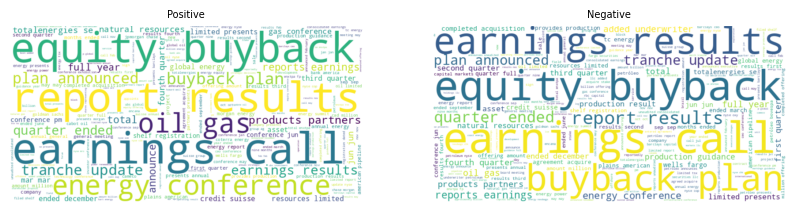

In [ ]:
df_tmp = dBert_ft_score.copy()
df_tmp = df_tmp[df_tmp['moving_prc_dir'] == df_tmp['prediction']]
df_tmp_neg = df_tmp[df_tmp['moving_prc_dir'] == 0]
df_tmp_pos = df_tmp[df_tmp['moving_prc_dir'] == 1]


## Set of stopwords
stop_words = set(stopwords.words('english'))

additional_stop_words = company_names_stop_words
stop_words.update(additional_stop_words)

## Tokenize and remove stopwords
def tokenize_and_remove_stopwords(text):
    ## Tokenize the text
    tokens = word_tokenize(str(text))
    ## Remove stopwords and non-alphabetic tokens
    filtered_tokens = [word.lower().strip() for word in tokens if word.lower().strip() not in stop_words and word.isalpha()]
    return filtered_tokens

def get_text_to_plot(df):
    df['tokens_nltk'] = df['combined_text'].apply(tokenize_and_remove_stopwords)
    ## Concat all text from Text column
    all_text = " ".join(text for text in df['tokens_nltk'].dropna().sum())
    return all_text

neg_text = get_text_to_plot(df_tmp_neg)
pos_text = get_text_to_plot(df_tmp_pos)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis('off')  # Do not show axes to keep it clean
ax1.set_title('Positive', fontsize=7)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neg_text)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis('off')  # Do not show axes to keep it clean
ax2.set_title('Negative', fontsize=7)

plt.show()

In [ ]:
df_tmp_pos.sort_values(by=['sentiment_score'], ascending=False)['combined_text'].values

array(['Fremont Petroleum Corporation Limited Collaborates with Schlumberger',
       'Schlumberger Limited Presents at Offshore Technology Conference - OTC Tour, May-06-2019 through May-09-2019 Schlumberger Limited Presents at Citi’s Global Energy & Utilities Conference 2019, May-14-2019 12:00 PM Schlumberger Limited Presents at UBS Global Oil & Gas Conference, May-21-2019 Schlumberger Limited Presents at Wells Fargo 4th Annual West Coast Energy Conference, Jun-11-2019 08:15 AM Schlumberger Limited Presents at J.P. Morgan Energy Conference, Jun-18-2019 08:00 AM Wells Fargo Securities, LLC, Wells Fargo 4th Annual West Coast Energy Conference, Jun 11, 2019 through Jun 12, 2019 JPMorgan Chase & Co., J.P. Morgan Energy Conference, Jun 18, 2019 through Jun 19, 2019 Schlumberger Limited Appoints Aaron Gatt Floridia as Senior Advisor to the Chief Operating Officer',
       'UBS Investment Bank, UBS Global Oil & Gas Conference, May 20, 2019 through May 22, 2019',
       ..., 'Sonatrach Mulls 

In [ ]:
df_tmp_neg.sort_values(by=['sentiment_score'], ascending=True)['combined_text'].values

array(['Enbridge Inc. Presents at CIBC 20th Annual Whistler Institutional Investor Conference, Jan-25-2017 03:25 PM',
       'TransCanada Corporation - Analyst/Investor Day TransCanada Corporation, Analyst/Investor Day, Sep 15, 2016',
       "Smart Pipe Company, Inc. announced that it has received $6.6 million in funding from Enbridge Inc. Enbridge Inc. Announces Redemption of Cumulative Redeemable Preference Shares, Series J Enbridge Inc. Announces Election of Directors Declaration of Voting Results by Enbridge Inc Tranche Update on Enbridge Inc. (TSX:ENB)'s Equity Buyback Plan announced on December 31, 2021. Enbridge Inc. and Humble Midstream, LLC to Develop Low-carbon Hydrogen and Ammonia Production and Export Facilities at Enbridge Ingleside Energy Center",
       ...,
       "BP PLC Announces Production Results for the Fourth Quarter and Full Year Ended Dec. 31, 2019; Provides Production Guidance for the First-Quarter 2020 Bp plc Reports Earnings Results for the Fourth Quarter End

In [ ]:
def plot_pos_neg_wordcloud(df):
    df_tmp = df.copy()
    df_tmp = df_tmp[df_tmp['moving_prc_dir'] == df_tmp['prediction']]
    df_tmp_neg = df_tmp[df_tmp['moving_prc_dir'] == 0]
    df_tmp_pos = df_tmp[df_tmp['moving_prc_dir'] == 1]

    df_tmp_neg = df_tmp_neg.sort_values(by=['sentiment_score'], ascending=True).head(int(0.2 * len(df_tmp_neg)))
    df_tmp_pos = df_tmp_pos.sort_values(by=['sentiment_score'], ascending=False).head(int(0.2 * len(df_tmp_pos)))

    ## Set of stopwords
    stop_words = set(stopwords.words('english'))

    additional_stop_words = company_names_stop_words
    stop_words.update(additional_stop_words)

    ## Tokenize and remove stopwords
    def tokenize_and_remove_stopwords(text):
        ## Tokenize the text
        tokens = word_tokenize(str(text))
        ## Remove stopwords and non-alphabetic tokens
        filtered_tokens = [word.lower().strip() for word in tokens if word.lower().strip() not in stop_words and word.isalpha()]
        return filtered_tokens

    def get_text_to_plot(df):
        df['tokens_nltk'] = df['combined_text'].apply(tokenize_and_remove_stopwords)
        ## Concat all text from Text column
        all_text = " ".join(text for text in df['tokens_nltk'].dropna().sum())
        return all_text

    neg_text = get_text_to_plot(df_tmp_neg)
    pos_text = get_text_to_plot(df_tmp_pos)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
    ax1.imshow(wordcloud, interpolation='bilinear')
    ax1.axis('off')  # Do not show axes to keep it clean
    ax1.set_title('Positive', fontsize=7)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neg_text)
    ax2.imshow(wordcloud, interpolation='bilinear')
    ax2.axis('off')  # Do not show axes to keep it clean
    ax2.set_title('Negative', fontsize=7)

    plt.show()

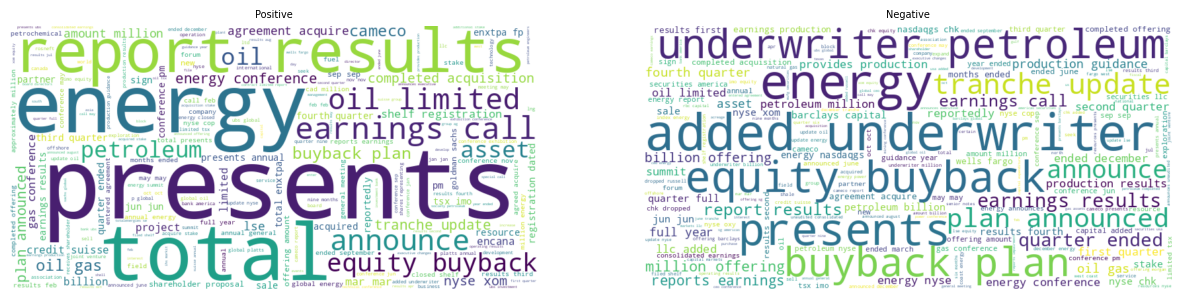

In [ ]:
plot_pos_neg_wordcloud(finbert_ft_score)

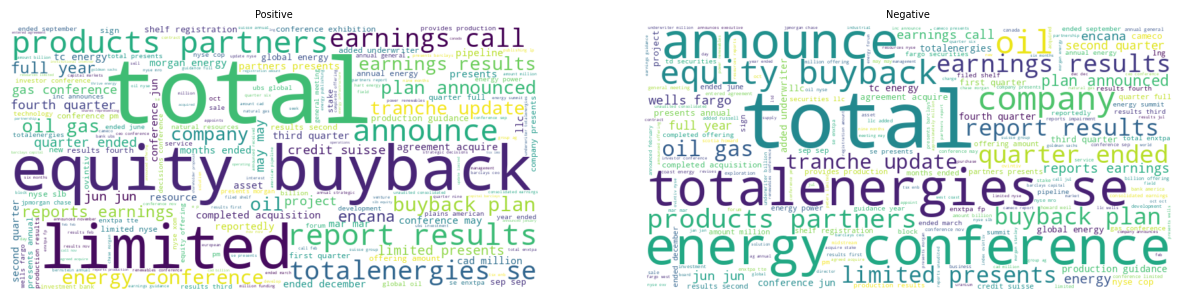

In [ ]:
plot_pos_neg_wordcloud(dBert_ft_score)

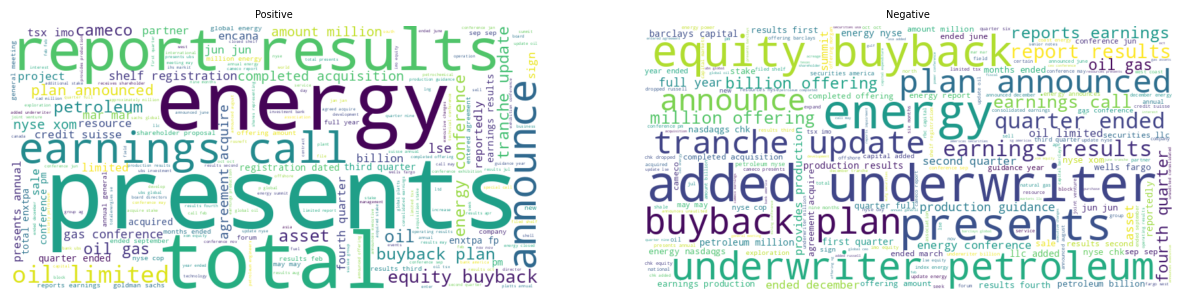

In [ ]:
plot_pos_neg_wordcloud(finbert_ft_score)

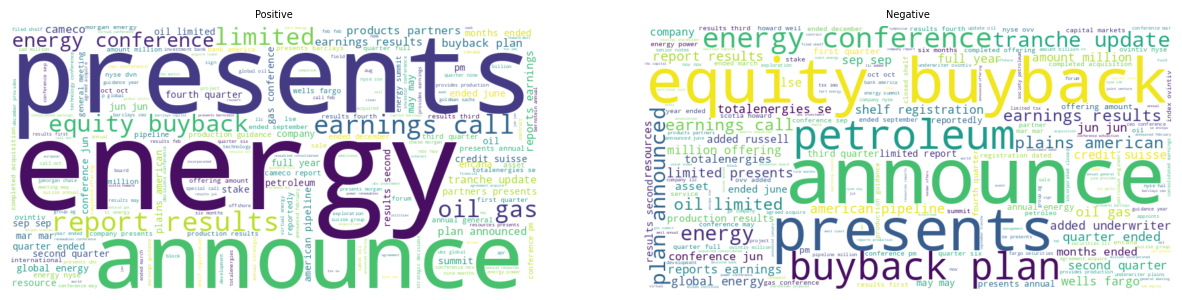

In [ ]:
plot_pos_neg_wordcloud(bert_score)

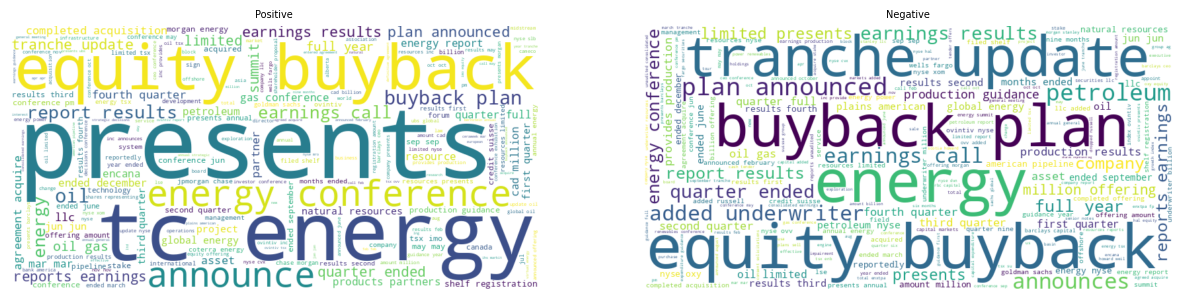

In [ ]:
plot_pos_neg_wordcloud(roberta_score)

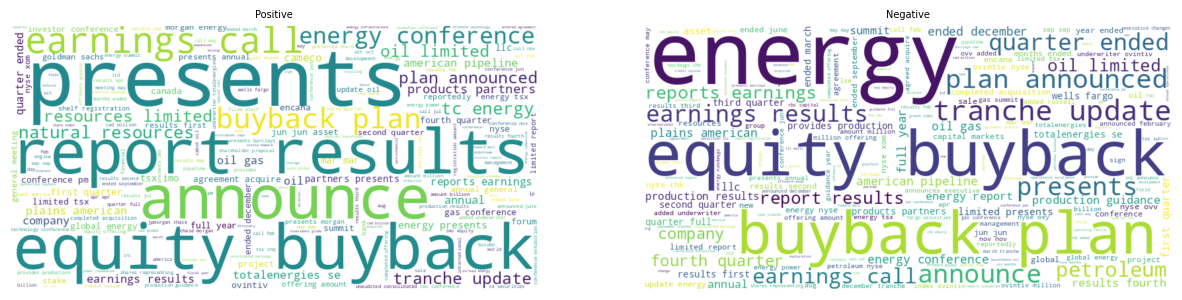

In [ ]:
plot_pos_neg_wordcloud(dBert_score)

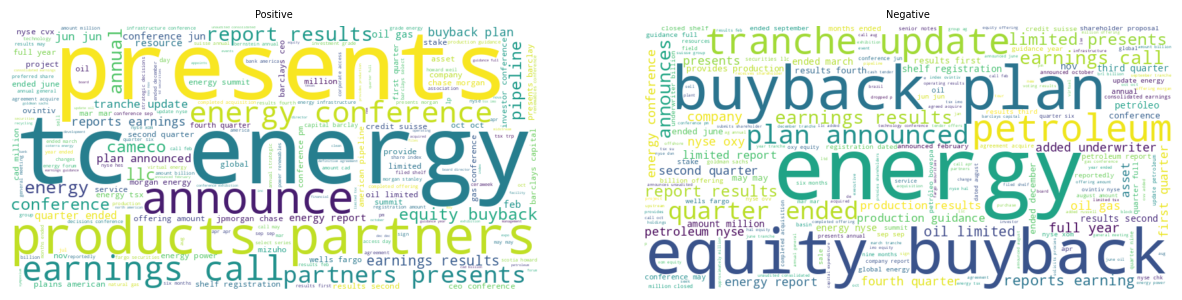

In [ ]:
plot_pos_neg_wordcloud(dRoBerta_score)

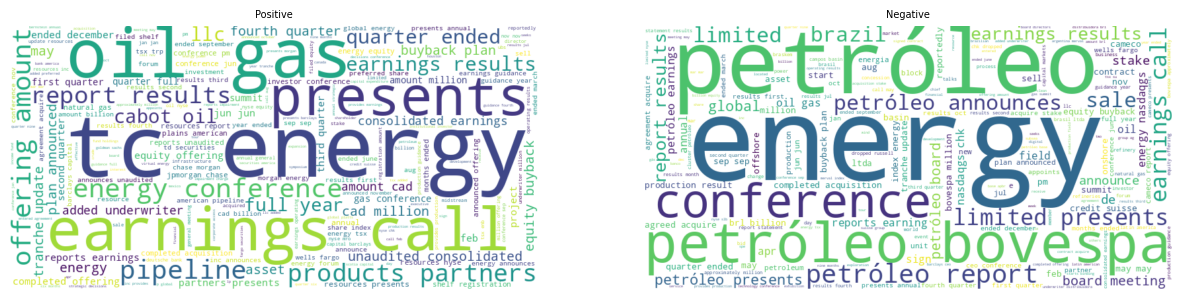

In [ ]:
plot_pos_neg_wordcloud(bert_ft_score)

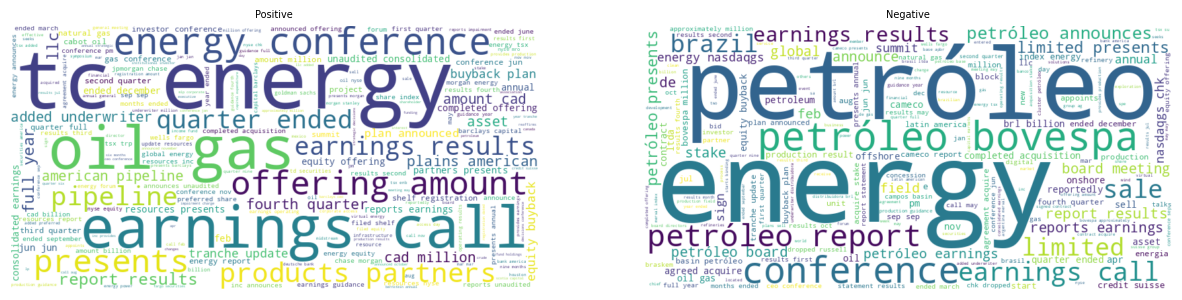

In [ ]:
plot_pos_neg_wordcloud(roberta_ft_score)

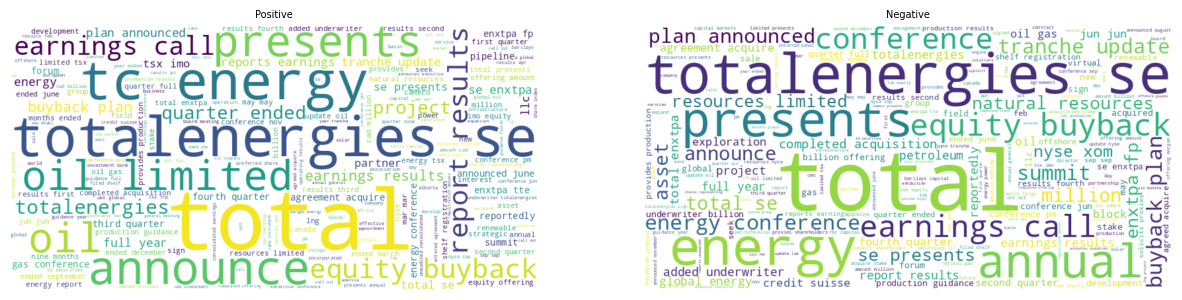

In [ ]:
plot_pos_neg_wordcloud(dRoBerta_ft_score)

# Cusfusion Matrix

In [ ]:
from sklearn import metrics

In [ ]:
def plot_confusion_matrix(df_pretrained, df_finetuned, model_nm):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    df_tmp = df_pretrained.copy()
    confusion_matrix = metrics.confusion_matrix(df_tmp['moving_prc_dir'], df_tmp['prediction'], normalize='all')
    sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cbar=False, ax=ax1)
    ax1.set_xlabel('Predicted Labels')
    ax1.set_ylabel('True Labels')
    ax1.set_title(f'{model_nm}')

    df_tmp = df_finetuned.copy()
    confusion_matrix = metrics.confusion_matrix(df_tmp['moving_prc_dir'], df_tmp['prediction'], normalize='all')
    sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cbar=False, ax=ax2)
    ax2.set_xlabel('Predicted Labels')
    ax2.set_ylabel('True Labels')
    ax2.set_title(f'{model_nm}')

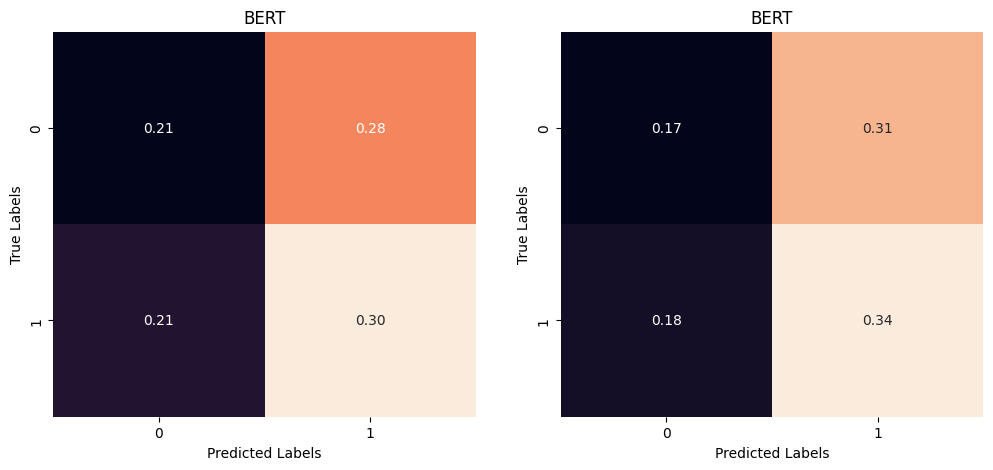

In [ ]:
plot_confusion_matrix(bert_score, bert_ft_score, 'BERT')

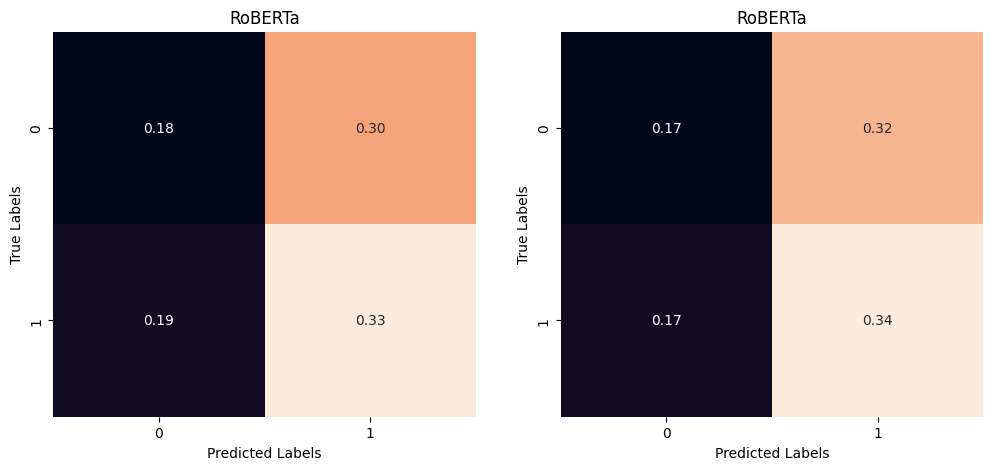

In [ ]:
plot_confusion_matrix(roberta_score, roberta_ft_score, 'RoBERTa')

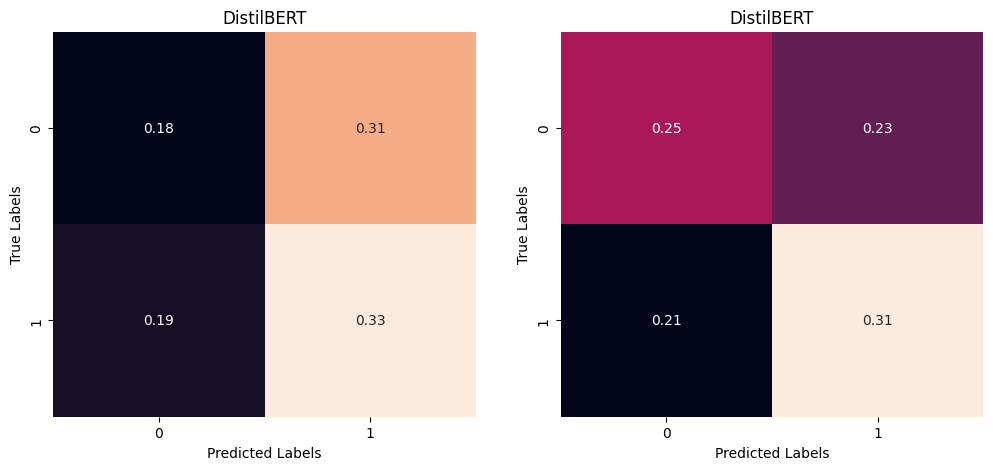

In [ ]:
plot_confusion_matrix(dBert_score, dBert_ft_score, 'DistilBERT')

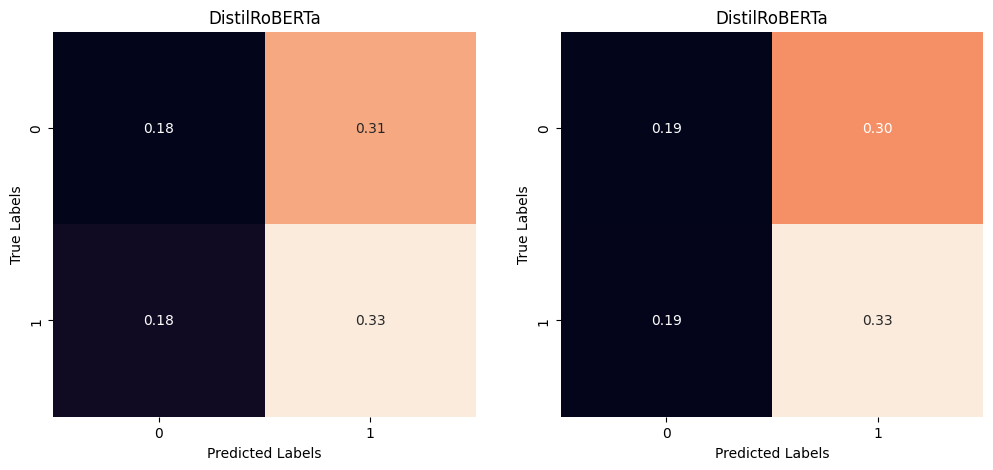

In [ ]:
plot_confusion_matrix(dRoBerta_score, dRoBerta_ft_score, 'DistilRoBERTa')

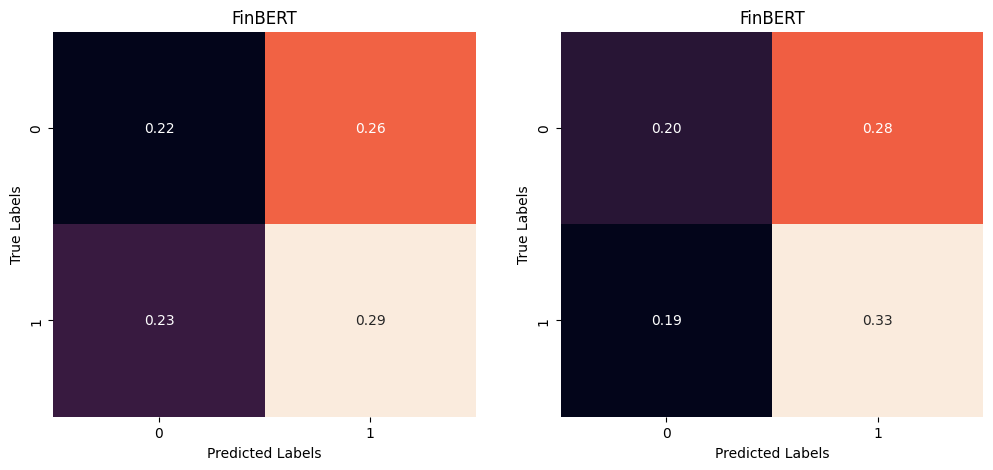

In [ ]:
plot_confusion_matrix(finbert_score, finbert_ft_score, 'FinBERT')

# Classification Report

In [ ]:
from sklearn import metrics

In [ ]:
def print_classification_port(df_pretrained, df_finetuned):
    df_tmp = df_pretrained.copy()
    print(metrics.classification_report(df_tmp['moving_prc_dir'], df_tmp['prediction']))

    df_tmp = df_finetuned.copy()
    print(metrics.classification_report(df_tmp['moving_prc_dir'], df_tmp['prediction']))

In [ ]:
print_classification_port(bert_score, bert_ft_score)

              precision    recall  f1-score   support

           0       0.49      0.43      0.46      4976
           1       0.52      0.58      0.55      5318

    accuracy                           0.51     10294
   macro avg       0.51      0.51      0.50     10294
weighted avg       0.51      0.51      0.50     10294

              precision    recall  f1-score   support

           0       0.49      0.35      0.41      4976
           1       0.52      0.66      0.58      5318

    accuracy                           0.51     10294
   macro avg       0.50      0.50      0.49     10294
weighted avg       0.50      0.51      0.50     10294



In [ ]:
print_classification_port(roberta_score, roberta_ft_score)

              precision    recall  f1-score   support

           0       0.49      0.37      0.42      4976
           1       0.52      0.64      0.57      5318

    accuracy                           0.51     10294
   macro avg       0.51      0.51      0.50     10294
weighted avg       0.51      0.51      0.50     10294

              precision    recall  f1-score   support

           0       0.49      0.34      0.40      4976
           1       0.52      0.66      0.58      5318

    accuracy                           0.51     10294
   macro avg       0.50      0.50      0.49     10294
weighted avg       0.50      0.51      0.50     10294



In [ ]:
print_classification_port(dBert_score, dBert_ft_score)

              precision    recall  f1-score   support

           0       0.49      0.37      0.42      4976
           1       0.52      0.64      0.57      5318

    accuracy                           0.51     10294
   macro avg       0.50      0.50      0.50     10294
weighted avg       0.50      0.51      0.50     10294

              precision    recall  f1-score   support

           0       0.55      0.52      0.53      4976
           1       0.57      0.60      0.58      5318

    accuracy                           0.56     10294
   macro avg       0.56      0.56      0.56     10294
weighted avg       0.56      0.56      0.56     10294



In [ ]:
print_classification_port(dRoBerta_score, dRoBerta_ft_score)

              precision    recall  f1-score   support

           0       0.49      0.37      0.42      4976
           1       0.52      0.65      0.58      5318

    accuracy                           0.51     10294
   macro avg       0.51      0.51      0.50     10294
weighted avg       0.51      0.51      0.50     10294

              precision    recall  f1-score   support

           0       0.50      0.39      0.44      4976
           1       0.53      0.64      0.58      5318

    accuracy                           0.52     10294
   macro avg       0.51      0.51      0.51     10294
weighted avg       0.51      0.52      0.51     10294



In [ ]:
print_classification_port(finbert_score, finbert_ft_score)

              precision    recall  f1-score   support

           0       0.49      0.45      0.47      4976
           1       0.52      0.56      0.54      5318

    accuracy                           0.51     10294
   macro avg       0.50      0.50      0.50     10294
weighted avg       0.51      0.51      0.50     10294

              precision    recall  f1-score   support

           0       0.52      0.42      0.46      4976
           1       0.54      0.64      0.59      5318

    accuracy                           0.53     10294
   macro avg       0.53      0.53      0.52     10294
weighted avg       0.53      0.53      0.53     10294

